In [1]:
!jt -t chesterish

In [3]:
import matplotlib.pylab as plt
import numpy as np

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Probability" data-toc-modified-id="Probability-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Probability</a></span><ul class="toc-item"><li><span><a href="#Joint-Probability" data-toc-modified-id="Joint-Probability-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Joint Probability</a></span></li><li><span><a href="#Conditional-Probability" data-toc-modified-id="Conditional-Probability-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Conditional Probability</a></span></li><li><span><a href="#Bayes-Rule" data-toc-modified-id="Bayes-Rule-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Bayes Rule</a></span></li><li><span><a href="#Likelihood" data-toc-modified-id="Likelihood-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Likelihood</a></span></li><li><span><a href="#Extra:-Philosophical-Debate:-Frequentist-vs-Bayesian" data-toc-modified-id="Extra:-Philosophical-Debate:-Frequentist-vs-Bayesian-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Extra: Philosophical Debate: Frequentist vs Bayesian</a></span></li></ul></li><li><span><a href="#Statistical-Inference" data-toc-modified-id="Statistical-Inference-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Statistical Inference</a></span><ul class="toc-item"><li><span><a href="#(my)-Philosphy-of-Statistical-Inference" data-toc-modified-id="(my)-Philosphy-of-Statistical-Inference-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>(my) Philosphy of Statistical Inference</a></span></li><li><span><a href="#Maximal-Likelihood-Estimate" data-toc-modified-id="Maximal-Likelihood-Estimate-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Maximal Likelihood Estimate</a></span></li><li><span><a href="#MLE-and-optimization" data-toc-modified-id="MLE-and-optimization-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>MLE and optimization</a></span></li><li><span><a href="#Fisher-Information" data-toc-modified-id="Fisher-Information-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Fisher Information</a></span></li></ul></li></ul></div>

# Neuro120 Section 3 Statistics and MLE Review

## Probability

Flow is partially inspired by Probability lecture in [CS188, Berkeley](https://inst.eecs.berkeley.edu/~cs188/su21/).

### Joint Probability

### Conditional Probability

### Bayes Rule

### Likelihood

### Extra: Philosophical Debate: Frequentist vs Bayesian

## Statistical Inference

### (my) Philosphy of Statistical Inference

When doing science we usually do some manipulations, observe and record some data (e.g. spikes). Data itself is great, but we want to draw conclusions about something else, something **greater**: 
* the underlying mechanisms or processes that generate this data. 
* whether our understanding of the system (hypothesis) is correct.

When doing so, we need **inference**. 

Generally, for a process of interest (say visual processing), we assume mother nature has a true **data generating process**, formalized as $G$. This process takes an experiment variable $x$ as input and maps it to a distribution of data $G(x)=p(y|x)$. Our data are sampled from such distribution
$$y\sim G(x)$$

To note, actual experiments as data generating process are noisy versions of this true one. 

However, for many processes (esp. biology), we don't know this true function $G$, we don't even know the form of it! 

The best we can do is to **approximate** this function with some function forms we know, 
$$\mathcal F=\{\theta\in\Theta|f(.;\theta)\}$$
, parametrized with $\theta$. We will try to get some knowledge of the parameter $\theta$ and draw conclusions about the system. 

* t-test: we approximate the data generating process by a normal distribution $\mathcal N(\mu,\sigma)$; we want to know sth. about $\mu$. 

Statistical inference has many forms. 
* simple ones like t-test, ANOVA, test the probability for null hypothesis to generate the data.
* **maximum likelihood inference** (MLE), give a point estimate of the parameter $\theta$

### Maximal Likelihood Estimate

### Analytical Example: MLE of a Normal Distribution

Take a simple example, we have some data $\{X_1,...X_n\}$. We **hypothesize** the data generative process is i.i.d. sampling from Gaussian distribution, that is to say our family is 
$$\mathcal F=\{\mu\in\mathbb R,\sigma>0\mid \mathcal N(\mu,\sigma)\}$$

We can use MLE to estimate the best parameter $(\mu,\sigma)$ in this family that generates the data.

Recall the density of normal distribution is 
$$p(x)=\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x-\mu)^{2}}{2\sigma^{2}}}$$

So, the probability of getting our data given $(\mu,\sigma)$ is

$$p(\{X_1,X_2,...X_n\}\mid \mu,\theta)=\prod_i p(X_i\mid \mu,\theta)\\
=\prod_i\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(X_i-\mu)^{2}}{2\sigma^{2}}}\\
=(\sigma\sqrt{2\pi})^{-n}e^{-\sum_i\frac{(X_i-\mu)^{2}}{2\sigma^{2}}}$$

This probaility is our likelihood. 
$$\mathcal L(\mu,\theta)=(\sigma\sqrt{2\pi})^{-n}e^{-\frac{\sum_i(X_i-\mu)^{2}}{2\sigma^{2}}}$$

For MLE, it doesn't hurt to transform the likelihood function with a **monotonic function** like log.

$$\begin{align}\log\mathcal L(\mu,\theta)=& -n\log(\sigma\sqrt{2\pi}) - \frac{\sum_i(X_i-\mu)^{2}}{2\sigma^{2}}\\
=& -\frac n2\log(2\pi) -n\log(\sigma) - \frac{\sum_i(X_i-\mu)^{2}}{2\sigma^{2}}
\end{align}$$

MLE solves this maximization problem 
$$\hat \theta = \arg\max_\theta \log\mathcal L(\theta) = \arg\max_\theta \mathcal L(\theta)$$

To find the maximum of log likelihood, we need its gradient to be zero.
$$\nabla \log\mathcal L(\mu,\theta)=\mathbb 0$$
which translates to two equations, 
$$0=\partial_\mu \log\mathcal L = \frac{1}{\sigma^{2}}\sum_i(X_i-\mu)$$
$$0=\partial_\sigma \log\mathcal L=-\frac n{\sigma}+\frac{\sum_i(X_i-\mu)^{2}}{\sigma^{3}}$$

Solving these two equations are surprisingly easy! 

We can solve $\mu$ independent of $\sigma$; and then bring $\hat \mu$ in. 
$$\hat \mu = \frac{1}{n}\sum_i X_i$$
$$\hat\sigma =\sqrt\frac{\sum_i(X_i-\hat\mu)^{2}}{n}$$

We recover the formula for mean and standard deviation, which shed a new interpretation on these:
* Sample mean and std are the best Gaussian parameters to generate a set of data.

### MLE and optimization

For few cases like above, we can solve MLE by hand -- solving $\nabla_\theta \mathcal L(\theta)=0$ analytically. 

More often than not, we need to solve MLE numerically, which is solving an optimization problem. 

Loss landscape of likelihood

![]()

<img src=attachment:image.png width=600>
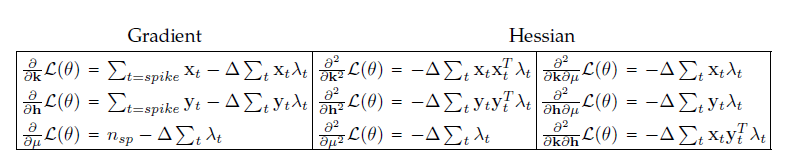

### Fisher Information

> MLE is powerful, but it's a point estimate. What about the variance or range?

MLE give us the **mode** of the likelihood function, when we need to provide a range for the parameters, we need 2nd order information. 

### Observed Fisher Information

### Extra: MLE and **Information Geometry**

> What is the geometry in the space of distributions?

The family of functions $\mathcal F= \{\theta\in\Theta\mid f(.;\theta)\}$ form a "manifold"

### Extra: Sloppiness

### Extra: MLE and MAP (Maximum a posteriori estimation)

> What if you have some prior knowledge of the parameter?

Sometimes you will encounter MAP inference in paper, which is closely related to MLE. In Bayesian inference framework this is a way to incorporate your prior knowledge. 

Say, from domain knowledge we have some prior knowledge about theta, like a distribution $g(\theta)$
Then our posteriori distribution is 
$$p()$$

Formula for MAP inference is, 
$$\hat\theta_{MAP} = \arg\max_\theta p(\theta \mid \{X_i\})g(\theta)$$

### Extra: MAP and Regularization

> Two interpretations of the same math: how to limit the complexity of our model?

Recall the overfitting problem introduced before. A model can be too complex and fit the data too well and generalize poorly. 

A common technique in regression and machine learning is to **add regularization term to the loss function**. 
* L1 regularization $\|\theta\|_1$
* L2 regularization $\|\theta\|_2^2=\sum_i \theta_i^2$

For MLE we can do the same trick, (using negative log likelihood) 
$$\hat \theta_{regMLE}=\arg\min_\theta -\log \mathcal L(\theta)+\beta \|\theta\|^2_2$$

But what does this mean? 

Actually, we can interpret it in the MAP framework. 

For MAP estimation, we can write the formula in NLL term. 
$$\hat\theta_{MAP} = \arg\min_\theta -\log \mathcal L(\theta)-\log g(\theta)$$

Note the 2nd term correspond to the $\beta\|\theta\|_2^2$ term above!


Thus, we know that the regularized MLE is identical to MAP estimate, when **the negative log density of prior is proportional to the regularization term.** (It's not equal because some normalization constant can be dropped.)

* For L2 regularization
    $$g(\theta)\propto \exp(-\beta\|\theta\|_2^2)=\exp(-\beta\sum_i\theta_i^2)$$
   * The prior for each parameter is i.id **Gaussian distribution** with 0 mean and variance $1/2\beta$.
* For L1 regularization
    $$g(\theta)\propto \exp(-\beta\|\theta\|_1)=\exp(-\beta\sum_i|\theta_i|)$$
   * The prior for each parameter is i.id [**Laplace distribution**](https://en.wikipedia.org/wiki/Laplace_distribution) with 0 mean and variance $2/\beta^2$.


Here is a plot with the two distributions, with matching first 3 moments matching (mean variance skewness)

From this plot, **tell me why L1 regularization is called "sparse prior"**

Laplace: mean 0.0 var 1.0 skew 0.0 kurt 3.0
Gaussian: mean 0.0 var 1.0 skew 0.0 kurt 0.0


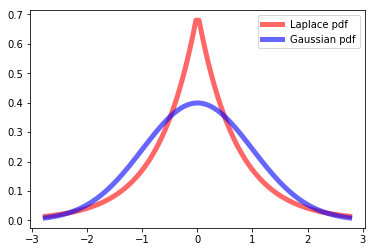

In [25]:
from scipy.stats import laplace, norm
lapl = laplace(0, 1/np.sqrt(2)) # set the b parameter
fig, ax = plt.subplots(1, 1)
mean_l, var_l, skew_l, kurt_l = lapl.stats(moments='mvsk')
mean_n, var_n, skew_n, kurt_n = norm.stats(moments='mvsk')
print("Laplace: mean %.1f var %.1f skew %.1f kurt %.1f"%(mean_l, var_l, skew_l, kurt_l))
print("Gaussian: mean %.1f var %.1f skew %.1f kurt %.1f"%(mean_n, var_n, skew_n, kurt_n))
x = np.linspace(lapl.ppf(0.01),lapl.ppf(0.99), 100)
ax.plot(x, lapl.pdf(x),
       'r-', lw=5, alpha=0.6, label='Laplace pdf')
ax.plot(x, norm.pdf(x),
       'b-', lw=5, alpha=0.6, label='Gaussian pdf')
ax.legend();

Here is another visualization of this intuition (from Cristina Savin pre in Neuromatch)
<img src=attachment:image.png width=700>
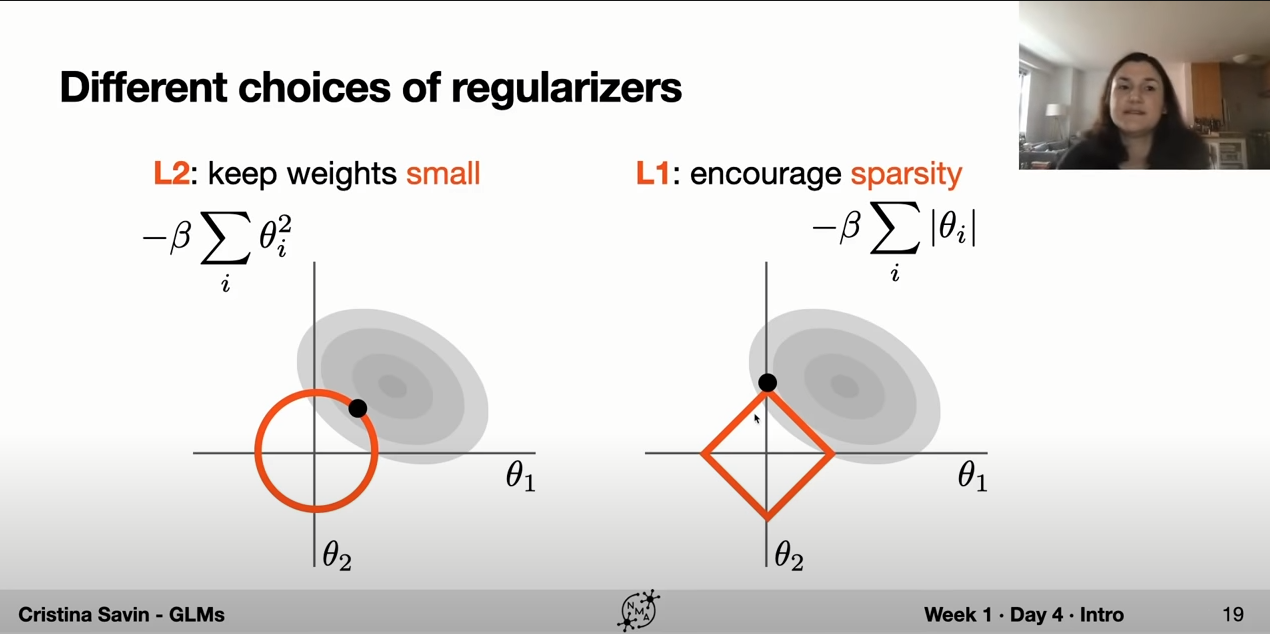

# Homework Q&A